# Lab | Cleaning numerical data

## Context:
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:
* Retain customers,
* Analyze relevant customer data,
* Develop focused customer retention programs.
* Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
* Case Study
* Get data
* Cleaning/Wrangling/EDA
* Processing Data
* Modeling -Validation
* Reporting

## Lab | 1 | Import libraries
Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Lab | 2 | Get data

In [2]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## Lab | 3 | Explore data

In [3]:
# First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Lab | 4 | Chage columns names

In [7]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

## Lab | 5 | Change 'effective to date' format

In [8]:
# Change effective to date column to datetime format.
display(data['Effective_To_Date'].head(),
        data['Effective_To_Date'].dtype)

0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective_To_Date, dtype: object

dtype('O')

In [9]:
data['Effective_To_Date']=pd.to_datetime(data['Effective_To_Date'])
display(data['Effective_To_Date'].head(),
        data['Effective_To_Date'].dtype)

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective_To_Date, dtype: datetime64[ns]

dtype('<M8[ns]')

## Lab | 6 | Create numerical_df

In [10]:
# Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df=data.select_dtypes('number')
numerical_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

## Lab | 7 | Differentiate Continuos-Discrete variables

In [11]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

def categorize_variables(dataframe, threshold=0.03):
    continuous_columns = []
    discrete_columns = []

    for column in dataframe.columns:
        unique_count = len(dataframe[column].unique())
        if unique_count / dataframe.shape[0] < threshold:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

    continuous_df = dataframe[continuous_columns]
    discrete_df = dataframe[discrete_columns]
    
    return continuous_df, discrete_df

In [12]:
continuous_df, discrete_df = categorize_variables(numerical_df)

In [13]:
print("Continuous Columns:")
print(continuous_df.columns)

Continuous Columns:
Index(['Customer_Lifetime_Value', 'Income', 'Total_Claim_Amount'], dtype='object')


In [14]:
print('Customer_Lifetime_Value ',len(numerical_df['Customer_Lifetime_Value'].value_counts()))
print('Income ',len(numerical_df['Income'].value_counts()))
print('Total_Claim_Amount ',len(numerical_df['Total_Claim_Amount'].value_counts()))

Customer_Lifetime_Value  8041
Income  5694
Total_Claim_Amount  5106


In [15]:
print("Discrete Columns:")
print(discrete_df.columns)

Discrete Columns:
Index(['Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies'],
      dtype='object')


In [16]:
print('Monthly_Premium_Auto ',len(numerical_df['Monthly_Premium_Auto'].value_counts()))
print('Months_Since_Last_Claim ',len(numerical_df['Months_Since_Last_Claim'].value_counts()))
print('Months_Since_Policy_Inception ',len(numerical_df['Months_Since_Policy_Inception'].value_counts()))
print('Number_of_Open_Complaints ',len(numerical_df['Number_of_Open_Complaints'].value_counts()))
print('Number_of_Policies ',len(numerical_df['Number_of_Policies'].value_counts()))

Monthly_Premium_Auto  202
Months_Since_Last_Claim  36
Months_Since_Policy_Inception  100
Number_of_Open_Complaints  6
Number_of_Policies  9


## Lab | 8 | Correlation matrix

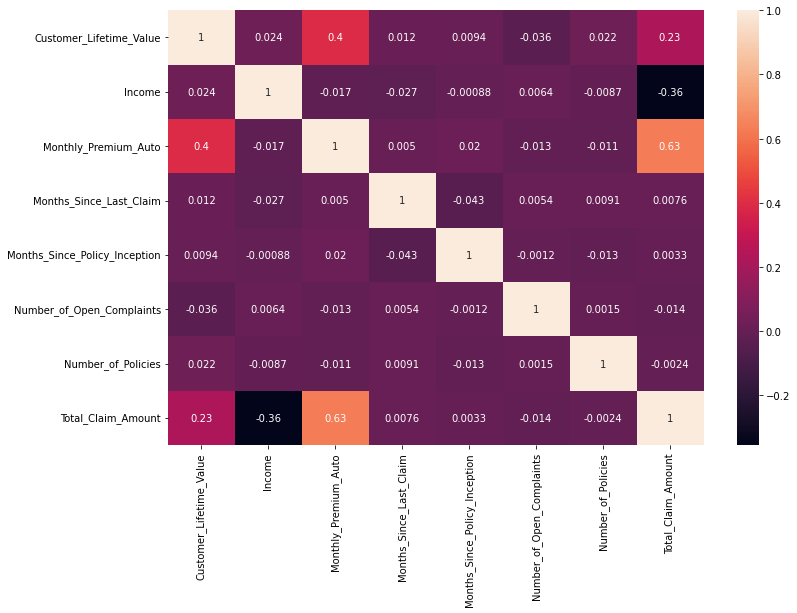

In [17]:
# Plot a correlation matrix, comment what you see.
corr_matrix=numerical_df.corr()  # default
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
# +Corr between Total Claim Amount and Customer lifetime value and monthly premium auto, and -Corr with income

## Lab | 9 | Plot discrete variables

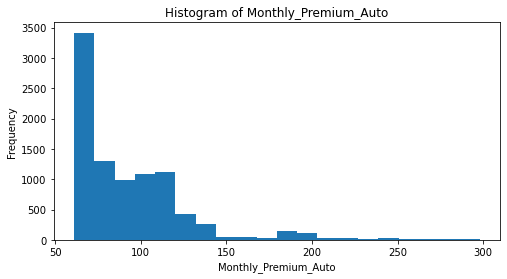

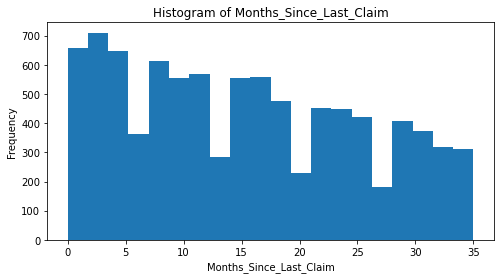

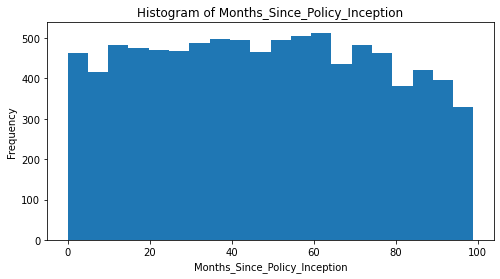

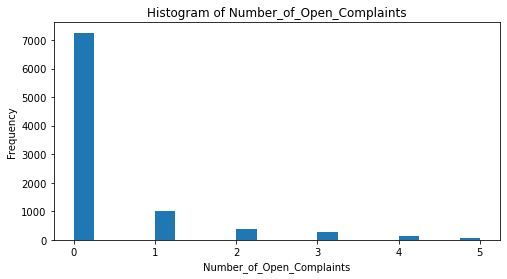

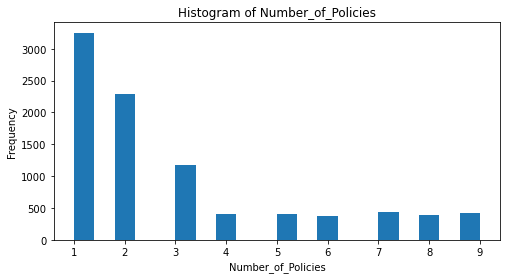

In [19]:
# Create a function to plot every discrete variable. 
# Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

import matplotlib.pyplot as plt

def plot_all_columns(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        plt.hist(dataframe[column], bins=20)  # You can adjust the number of bins as needed
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_all_columns(discrete_df)

## Lab | 9 | Plot continuous variables

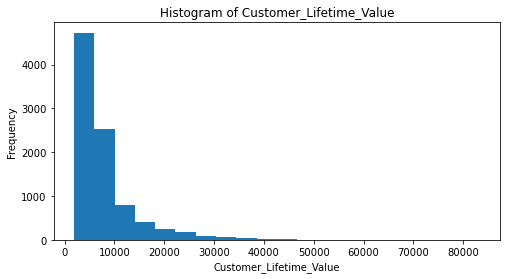

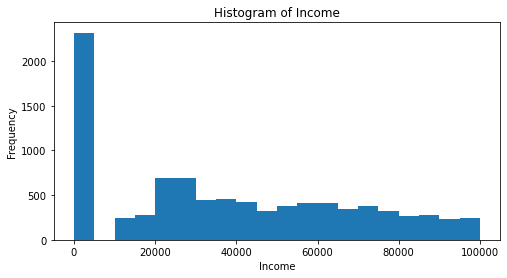

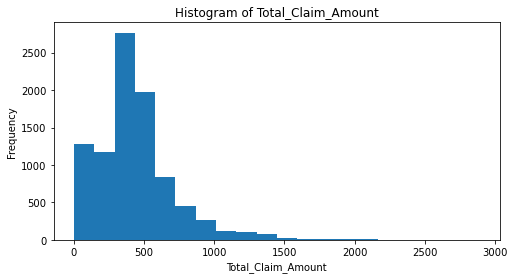

In [20]:
df = pd.DataFrame(continuous_df)
plot_all_columns(df)

## Lab | 10 | Analysis

In [21]:
# Comment what you can see in the plots.

In [22]:
numerical_df['Income'].value_counts()
# 2317 over the 9134 have 0 income, I confirmed that all of them are unemployed
filtered_data = data[data['Income'] == 0]
grouped_data = filtered_data.groupby(['Income', 'EmploymentStatus']).size().reset_index(name='Count')
print(grouped_data)

# data_crosstab = pd.crosstab(matrix_donors['DOMAIN'], matrix_donors['MDMAUD'], margins=False) #con margin=true tengo totales
# , margins=False)

   Income EmploymentStatus  Count
0       0       Unemployed   2317


In [23]:
numerical_df['Number_of_Open_Complaints'].value_counts()
# theres 7252 with 0 open complaints, it´s not an issue considering that not every costumer is expected to issue a claim...

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

## Lab | 11 | Plot outliers

In [24]:
# Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# Plot the boxplot
numerical_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

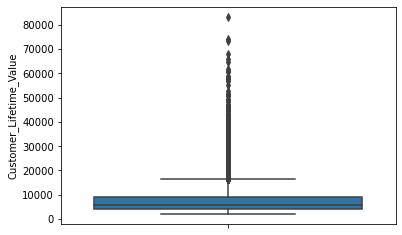

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplot
sns.boxplot(y=numerical_df['Customer_Lifetime_Value'])
plt.show()

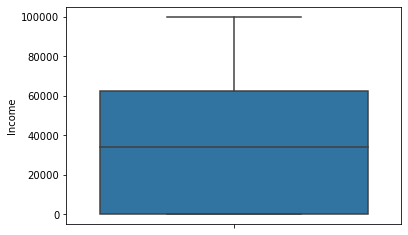

In [26]:

sns.boxplot(y=numerical_df['Income'])
plt.show()

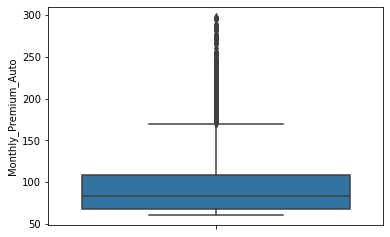

In [27]:
sns.boxplot(y=numerical_df['Monthly_Premium_Auto'])
plt.show()

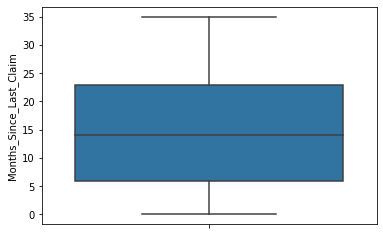

In [28]:
sns.boxplot(y=numerical_df['Months_Since_Last_Claim'])
plt.show()

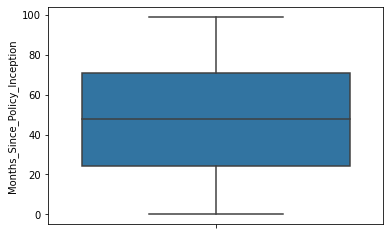

In [29]:
sns.boxplot(y=numerical_df['Months_Since_Policy_Inception'])
plt.show()

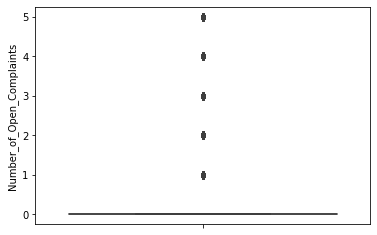

In [30]:
sns.boxplot(y=numerical_df['Number_of_Open_Complaints'])
plt.show()

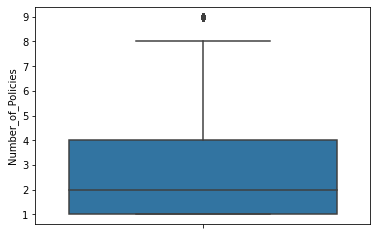

In [31]:
sns.boxplot(y=numerical_df['Number_of_Policies'])
plt.show()

## Lab | 12 | Outliers

In [32]:
# Did you find outliers? Comment what you will do with them. 
# If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [33]:
numerical_df['Customer_Lifetime_Value'].value_counts().tail(10).sort_index(ascending=True)

2374.147419    1
2611.836866    1
2655.996158    1
4603.975141    1
5641.359160    1
6874.848270    1
7380.086414    1
7591.109246    1
9162.063169    1
9934.865795    1
Name: Customer_Lifetime_Value, dtype: int64

In [34]:
numerical_df['Monthly_Premium_Auto'].value_counts().tail(10).sort_index(ascending=True)

178    1
204    1
232    1
248    1
268    1
273    1
275    1
281    1
286    1
287    1
Name: Monthly_Premium_Auto, dtype: int64

In [35]:
numerical_df['Number_of_Open_Complaints'].value_counts().head(10).sort_index(ascending=True)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

In [36]:
numerical_df['Number_of_Policies'].value_counts().head(15).sort_index(ascending=True)

1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
Name: Number_of_Policies, dtype: int64

### Lab | 13 | Check NaN values

In [37]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
numerical_df.isna().sum()

Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
dtype: int64

In [38]:
numerical_df.isnull().sum()

Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
dtype: int64

## Lab | 14 | Save numeric.csv

In [39]:
# Save the numerical_df to csv as numerical.csv You will use this file again this week.
file_path = "numerical.csv"

# Save the DataFrame to the CSV file
numerical_df.to_csv(file_path, index=False)  # Set index to False to exclude the index column

# Confirm that the DataFrame has been saved to the CSV file
print(f"DataFrame saved to {file_path}")

DataFrame saved to numerical.csv


# Lab | Cleaning categorical data

## Lab | 1-2 | Get data

In [40]:
# Open the notebook created for Lab-cleaning-numerical-data.
# Find all of the categorical data. Save it in a categorical_df variable.

In [41]:
categorical_df = data.select_dtypes(exclude=['number'])
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

## Lab | 3 | NaN values

In [42]:
# Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective_To_Date    0
EmploymentStatus     0
Gender               0
Location_Code        0
Marital_Status       0
Policy_Type          0
Policy               0
Renew_Offer_Type     0
Sales_Channel        0
Vehicle_Class        0
Vehicle_Size         0
dtype: int64

## Lab | 4 | Unique values of columns

In [43]:
# Check all unique values of columns.

In [44]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [45]:
categorical_df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [46]:
categorical_df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [47]:
categorical_df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [48]:
categorical_df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [49]:
categorical_df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [50]:
categorical_df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [51]:
categorical_df['Location_Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64

In [52]:
categorical_df['Marital_Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64

In [53]:
categorical_df['Policy_Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64

In [54]:
categorical_df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [55]:
categorical_df['Renew_Offer_Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew_Offer_Type, dtype: int64

In [56]:
categorical_df['Sales_Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64

In [57]:
categorical_df['Vehicle_Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64

In [58]:
categorical_df['Vehicle_Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle_Size, dtype: int64

## Lab | 5 | Datatypes

In [59]:
# Check dtypes. Do they all make sense as categorical data? Yes, everything looks perfectly well..
categorical_df.dtypes

Customer                     object
State                        object
Response                     object
Coverage                     object
Education                    object
Effective_To_Date    datetime64[ns]
EmploymentStatus             object
Gender                       object
Location_Code                object
Marital_Status               object
Policy_Type                  object
Policy                       object
Renew_Offer_Type             object
Sales_Channel                object
Vehicle_Class                object
Vehicle_Size                 object
dtype: object

## Lab | 6 | Alphanumeric values

In [60]:
# Does any column contain alpha and numeric data? 
# Decide how to clean it and do it now: Theres's no need to clean, It's the format choosen by the company to identify clients.
categorical_df['Customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

## Lab | 7 | Cleanning or wrangling

In [61]:
# Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
categorical_df['Combined_Policy'] = categorical_df['Policy'] + ' ' + categorical_df['Policy_Type']
categorical_df['Combined_Policy'].value_counts()

Personal L3 Personal Auto      3426
Personal L2 Personal Auto      2122
Personal L1 Personal Auto      1240
Corporate L3 Corporate Auto    1014
Corporate L2 Corporate Auto     595
Corporate L1 Corporate Auto     359
Special L2 Special Auto         164
Special L3 Special Auto         148
Special L1 Special Auto          66
Name: Combined_Policy, dtype: int64

## Lab | 8 | Combining columns policy and policy type

In [62]:
# Compare policy_type and policy. What information is contained in these columns.
# Can you identify what is important?

import pandas as pd
contingency_table = pd.crosstab(categorical_df['Policy'], categorical_df['Policy_Type'])
contingency_table

# Corporate L1, L2 y L3 are 'Corporate Auto' policy type
# Personal L1, L2 y L3 are 'Personal Auto' policy type
# Special L1, L2 y L3 are 'Special Auto' policy type
# I believe that we can ignore Policy Type column as we have all the information in the Policy column, 
# however I am not sure if we should ignore Policy column instead...

Policy_Type,Corporate Auto,Personal Auto,Special Auto
Policy,,,
Corporate L1,359,0,0
Corporate L2,595,0,0
Corporate L3,1014,0,0
Personal L1,0,1240,0
Personal L2,0,2122,0
Personal L3,0,3426,0
Special L1,0,0,66
Special L2,0,0,164
Special L3,0,0,148


In [63]:
categorical_df['policy_ptype'] = categorical_df['Policy'] +'-'+ categorical_df['Policy_Type']

In [64]:
categorical_df = categorical_df.drop(['Policy', 'Policy_Type'], axis=1)

In [65]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

In [66]:
categorical_df['policy_ptype'].value_counts()

Personal L3-Personal Auto      3426
Personal L2-Personal Auto      2122
Personal L1-Personal Auto      1240
Corporate L3-Corporate Auto    1014
Corporate L2-Corporate Auto     595
Corporate L1-Corporate Auto     359
Special L2-Special Auto         164
Special L3-Special Auto         148
Special L1-Special Auto          66
Name: policy_ptype, dtype: int64

## Lab | 9 | Combining columns

In [67]:
# Check number of unique values in each column, can they be combined in any way to ease encoding?
# Comment your thoughts and make those changes. 
# I already combined Policy and Policy type... I think the rest is fine

## Lab | 10 | Create categorical.csv

In [68]:
# Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
file_path = "categorical.csv"

# Save the DataFrame to the CSV file
numerical_df.to_csv(file_path, index=False)  # Set index to False to exclude the index column

# Confirm that the DataFrame has been saved to the CSV file
print(f"DataFrame saved to {file_path}")

DataFrame saved to categorical.csv


# Lab | Feature extraction

## Lab | 1-3 | Plot categorical

In [69]:
# Open the categorical dataframe we created before.
# Plot all the categorical variables with the proper plot. What can you see?
# There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?
# Make any changes you feel are necessary.

In [70]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

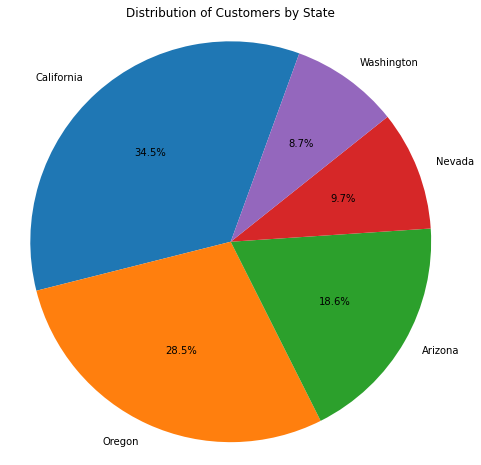

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

data = categorical_df  
state_column = 'State'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=70)
plt.title('Distribution of Customers by State')
plt.axis('equal')  
plt.show()

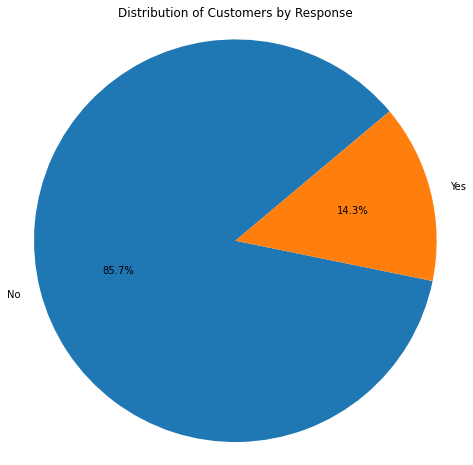

In [72]:
data = categorical_df  
state_column = 'Response'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Distribution of Customers by Response')
plt.axis('equal')  
plt.show()

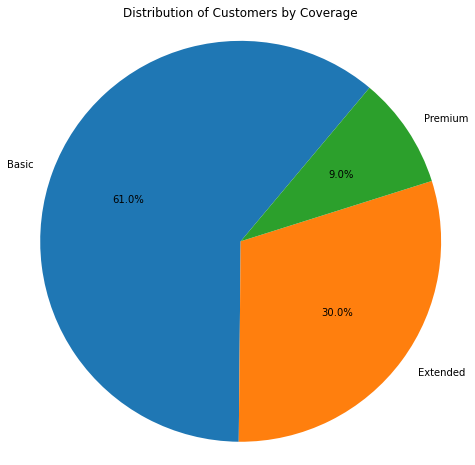

In [73]:
data = categorical_df 
state_column = 'Coverage'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Coverage')
plt.axis('equal')  
plt.show()

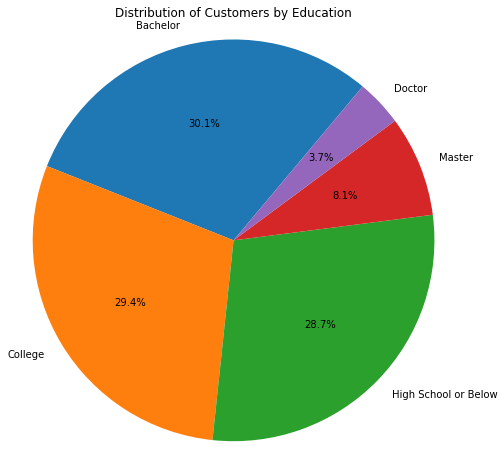

In [74]:
data = categorical_df  
state_column ='Education'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Education')
plt.axis('equal')  
plt.show()

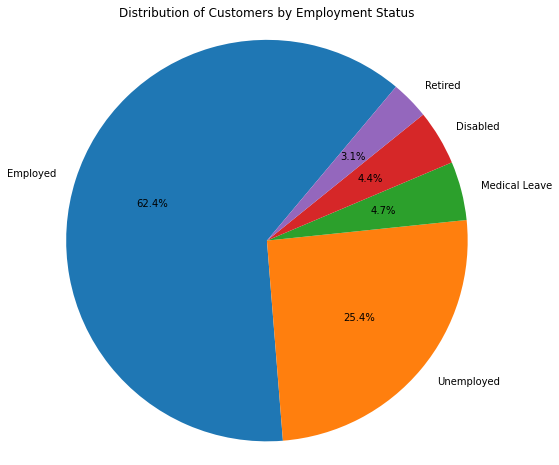

In [75]:
data = categorical_df  
state_column ='EmploymentStatus'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Employment Status')
plt.axis('equal')  
plt.show()

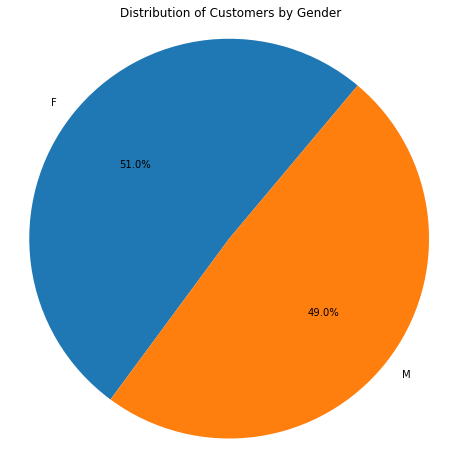

In [76]:
data = categorical_df  
state_column ='Gender'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Gender')
plt.axis('equal')  
plt.show()

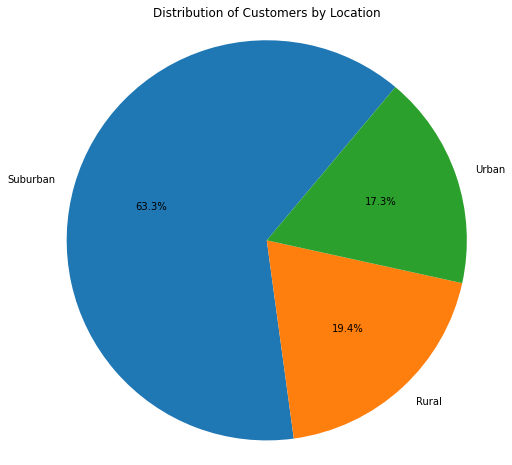

In [77]:
data = categorical_df  
state_column ='Location_Code'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Location')
plt.axis('equal')  
plt.show()

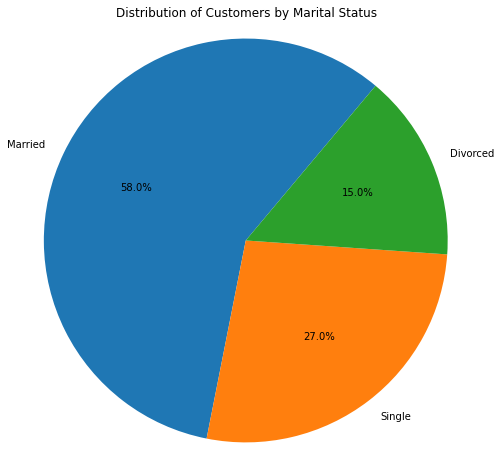

In [78]:
data = categorical_df  
state_column ='Marital_Status'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Marital Status')
plt.axis('equal')  
plt.show()

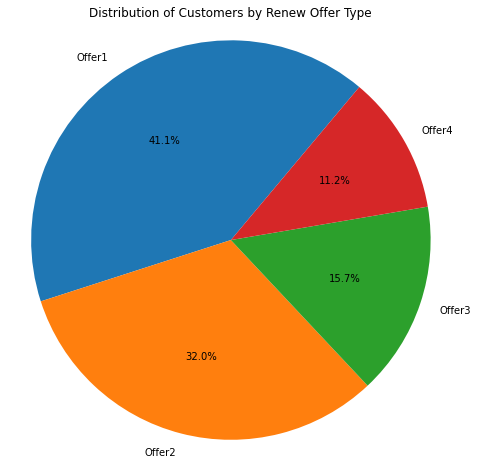

In [79]:
data = categorical_df  
state_column ='Renew_Offer_Type'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Renew Offer Type')
plt.axis('equal')  
plt.show()

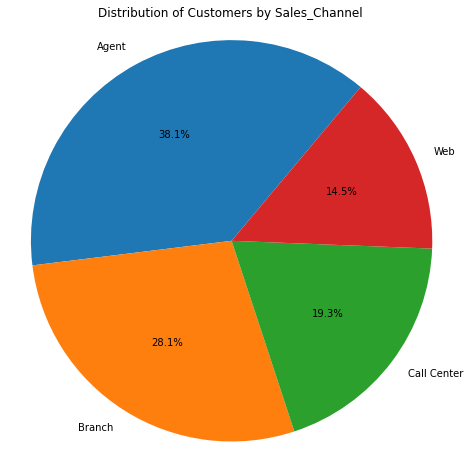

In [80]:
data = categorical_df  
state_column = 'Sales_Channel'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Sales_Channel')
plt.axis('equal')  
plt.show()       

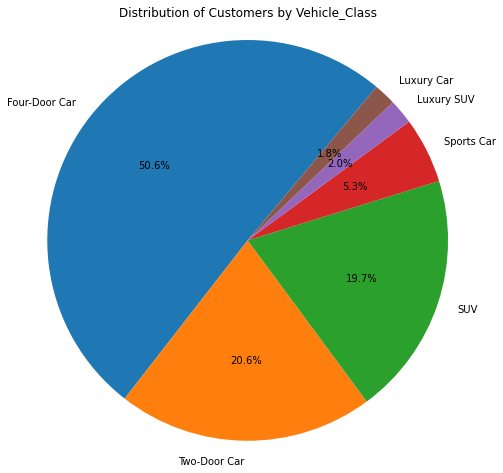

In [81]:
data = categorical_df  
state_column = 'Vehicle_Class'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Vehicle_Class')
plt.axis('equal')  
plt.show()       

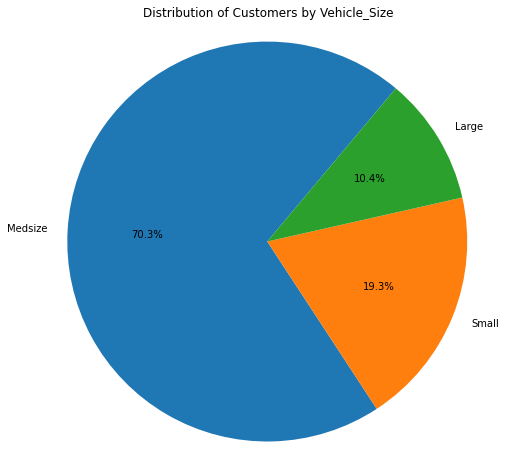

In [82]:
data = categorical_df  
state_column = 'Vehicle_Size'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Vehicle_Size')
plt.axis('equal')  
plt.show()

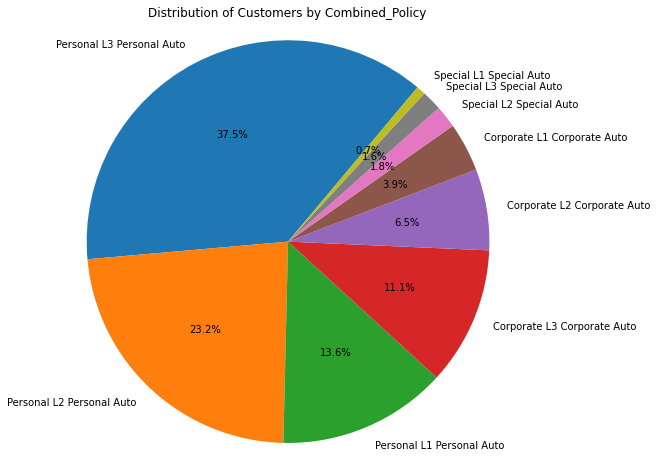

In [83]:
data = categorical_df  
state_column = 'Combined_Policy'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Combined_Policy')
plt.axis('equal')  
plt.show()

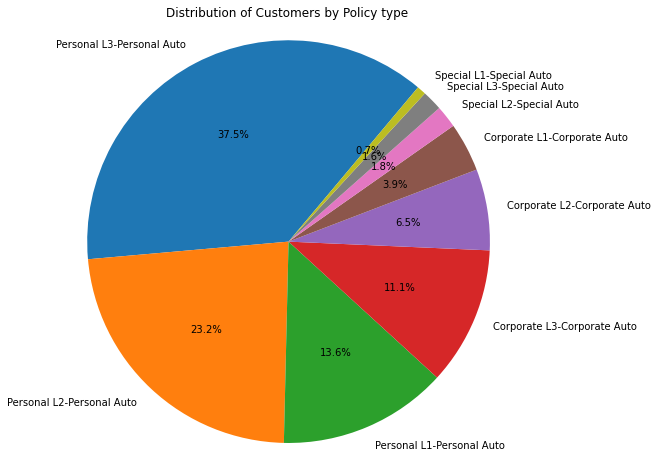

In [84]:
data = categorical_df  
state_column = 'policy_ptype'
state_counts = data[state_column].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Customers by Policy type')
plt.axis('equal')  
plt.show()

## Lab | 3-5 | Plot time variable

In [85]:
# Plot time variable. Can you extract something from it?
# The time variable can be useful. You shoud transform its data into a more useful form.
# Hint: Day, week, and month as integers might be useful.

In [86]:
categorical_df .columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

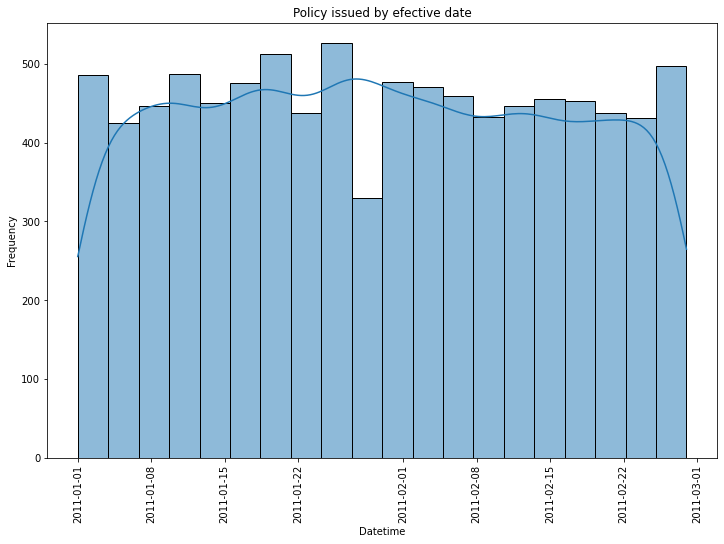

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

data = categorical_df   # Replace with your DataFrame
datetime_var = 'Effective_To_Date'

plt.figure(figsize=(12, 8))  # Width x Height

sns.histplot(data['Effective_To_Date'], kde=True, bins=20)  # Adjust the number of bins as needed

plt.xticks(rotation=90)  # You can adjust the rotation angle as needed

plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.title('Policy issued by efective date')

plt.show()